In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import warnings
warnings.filterwarnings("ignore")

In [12]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [29]:
pd.read_csv("test.csv")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [28]:
pd.read_csv("train.csv")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


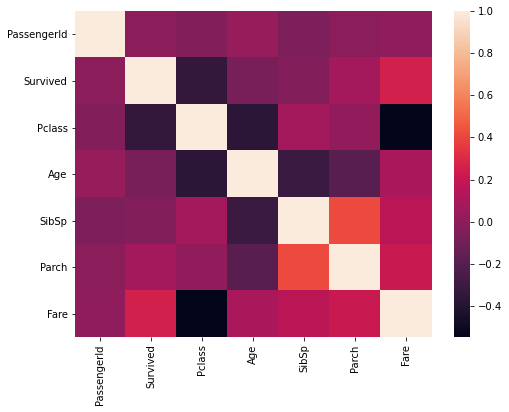

In [13]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(train.corr());

In [14]:
pd.DataFrame(train.groupby(["Pclass"]).mean()["Survived"])

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [15]:
#On va maintenant consrtuire un pipeline pour traiter les données

def clean_data(X):
    le = preprocessing.LabelEncoder()
    categorical = []
    error = []
    missing = X[X.isna().sum()[X.isna().sum()>0].index].dtypes[X[X.isna().sum()[X.isna().sum()>0].index].dtypes=="float64"].index
    for col in missing:
        X[col] = X[col].fillna(np.mean(train[col]))
    for i in X.columns:
        if X[i].dtypes=="O":
            categorical.append(i)
    for i in range(0, len(categorical)):
        if X[categorical[i]].isna().sum() == 0:
            X[categorical[i]] = le.fit_transform(X[categorical[i]])
        else:
            error.append(categorical[i])
    X[error] = X[error].fillna("No such thing")
    for i in range(0, len(error)):
        X[error][i] = le.fit_transform(X[error][i])
    return X

def get_estimator():
    data_cleaner = FunctionTransformer(clean_data)
    model = XGBClassifier(n_estimators=2500, colsample_bytree=0.6, gamma=9, max_depth=4, min_child_weight=1, subsample=0.8, learning_rate=0.029)
    return make_pipeline(data_cleaner, model)

In [17]:
clean_data(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,146,3
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,146,3
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,3
4,5,0,3,15,1,35.000000,0,0,472,8.0500,146,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,146,3
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,3
888,889,0,3,413,0,29.699118,1,2,675,23.4500,146,3
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

X, y = train.drop(["Survived"], axis=1), train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=28, p=1)
lr = LogisticRegression(C=0.2,random_state=1, max_iter=150)
rf = RandomForestClassifier(n_estimators=500,max_features=4, max_depth=5, min_samples_leaf=11, random_state=1, n_jobs=-1)
#rf = RandomForestClassifier(n_estimators=25,max_features=3, max_depth=6, min_samples_leaf=9, random_state=42, n_jobs=-1)

sgd = SGDClassifier(alpha=0.1, max_iter=50, n_jobs=-1, random_state=0)
adb = AdaBoostClassifier(base_estimator=LogisticRegression(random_state=1),
                   learning_rate=0.9, n_estimators=21, random_state=1)
#adb = AdaBoostClassifier(base_estimator=LogisticRegression(random_state=1),
 #                  learning_rate=0.3, n_estimators=70, random_state=1)

bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=5,
                  max_samples=40, n_estimators=20, random_state=1)
#bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=6,
 #                 max_samples=60, n_estimators=20, random_state=21)
xgb_clf = xgb.XGBClassifier(base_score=0.5, objective='binary:logistic', n_estimators=1000,seed=1, learning_rate=1, max_depth=5)

classifiers = [('Logistic Regression', lr),
              ('Random Forest', rf),
              ('AdaBoostClassifier', adb),
              #('sgd', sgd),
               #('knn', knn),
               #('xgb', xgb_clf),
              ('BaggingClassifier', bc)]  

for clf_name , clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : {:.4f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.7836
Random Forest : 0.8172
AdaBoostClassifier : 0.8097
BaggingClassifier : 0.7575


In [25]:
vc = VotingClassifier(estimators=classifiers)
vc.fit(X, y)

y_pred = vc.predict(X_test)
print('VotingClassifier_score: {:.4f}'.format(vc.score(X_test, y_test)))

print('VotingClassifier: {:.4f}'.format(accuracy_score(y_test, y_pred)))

VotingClassifier_score: 0.8172
VotingClassifier: 0.8172


In [27]:
submission = pd.read_csv("gender_submission.csv")
test = clean_data(test)
y_pred = vc.predict(test)

for i in range(len(y_pred)):
    submission["Survived"][i] = y_pred[i]
    
submission.to_csv("First_submission.csv", index=False)